In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [381]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
data = pd.read_csv("seeds.csv")
data = data.dropna()

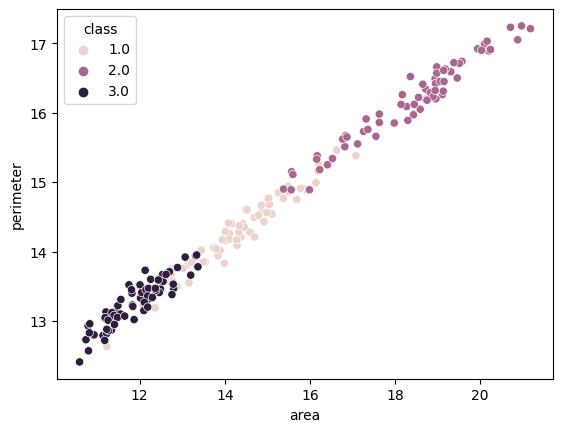

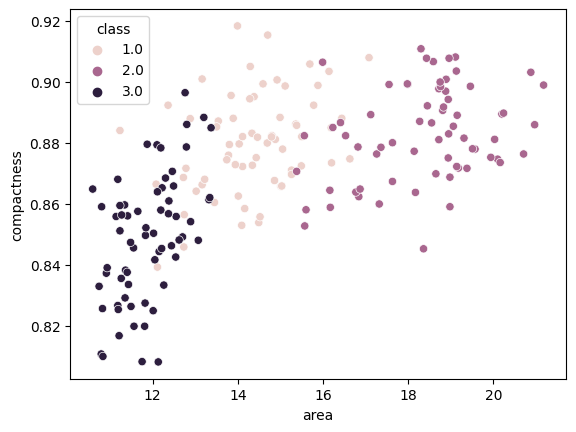

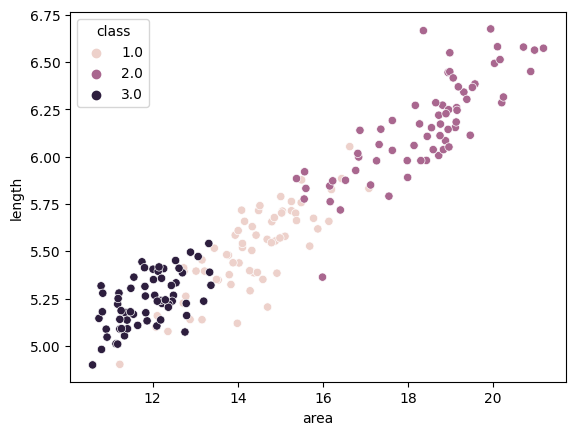

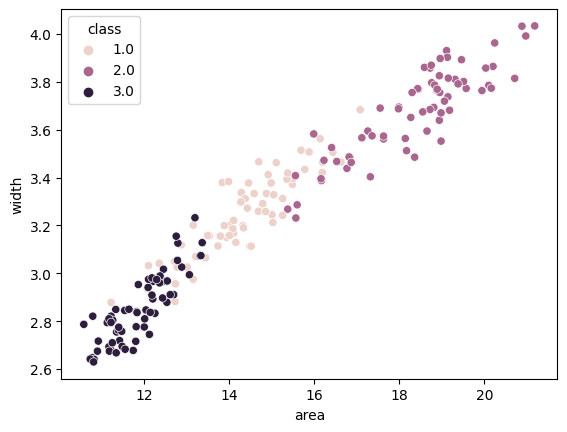

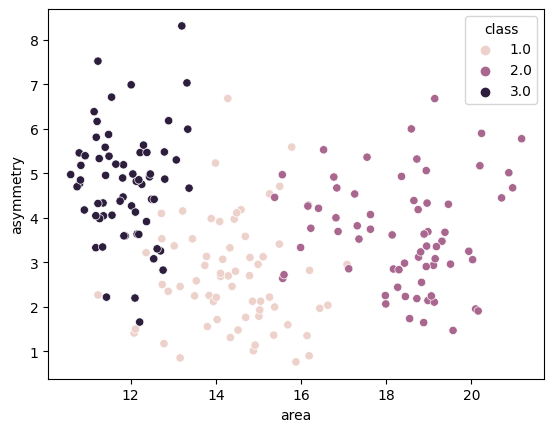

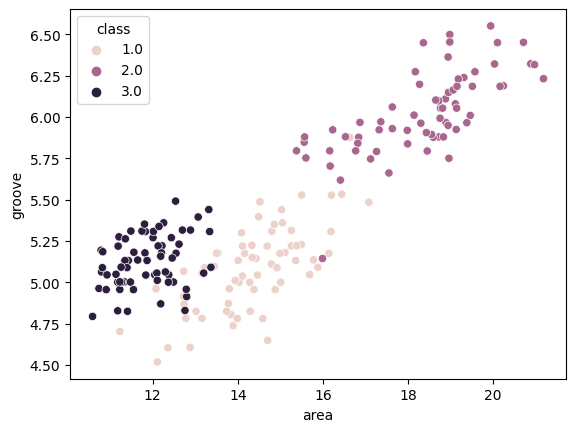

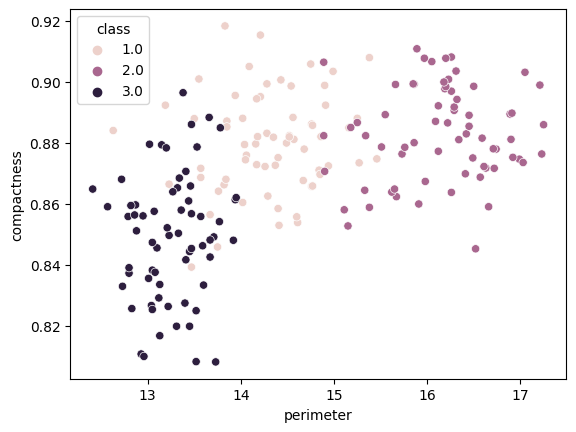

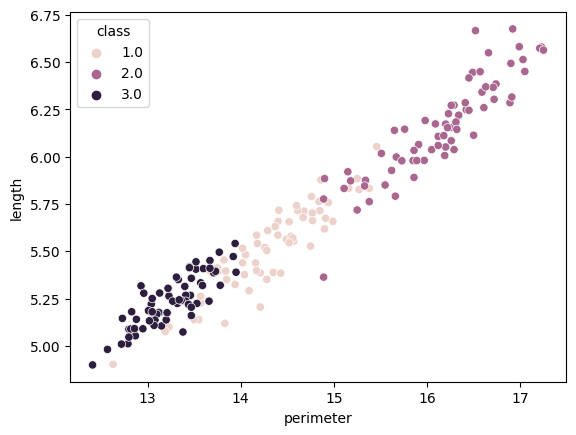

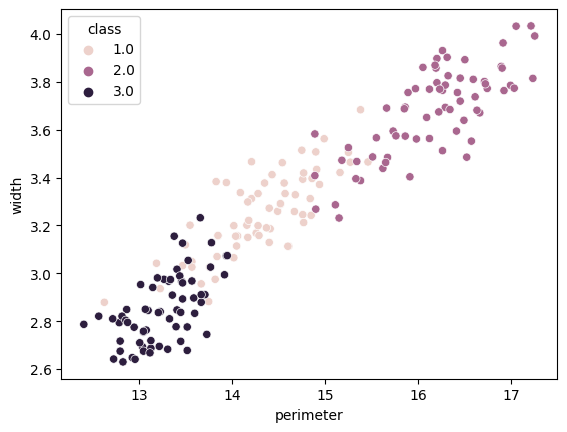

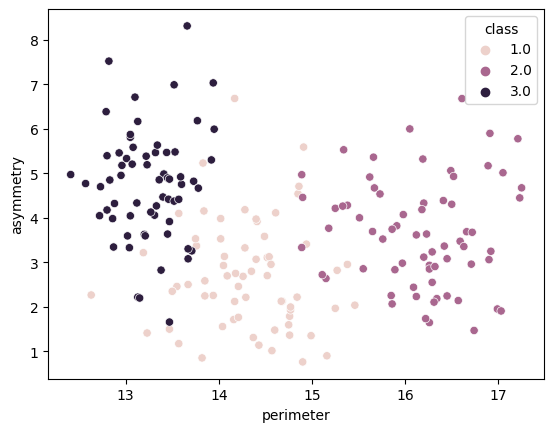

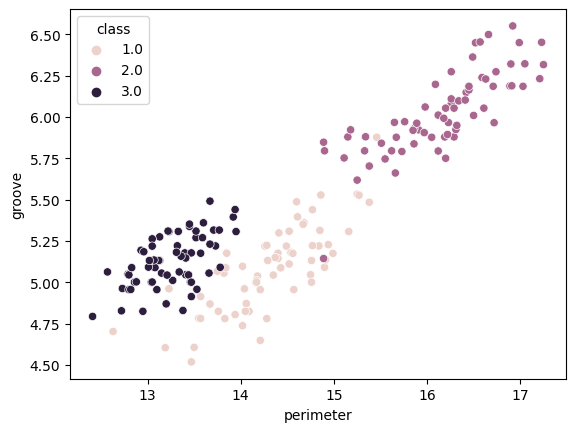

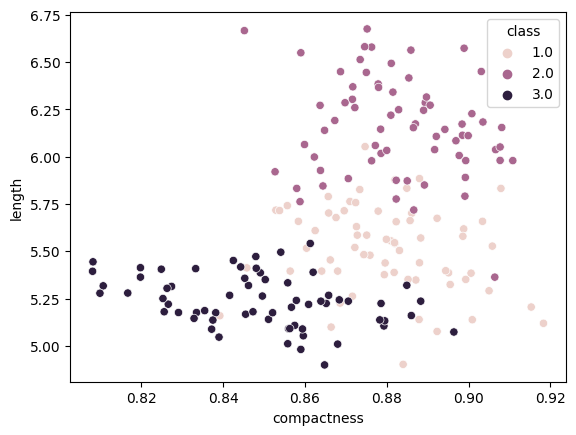

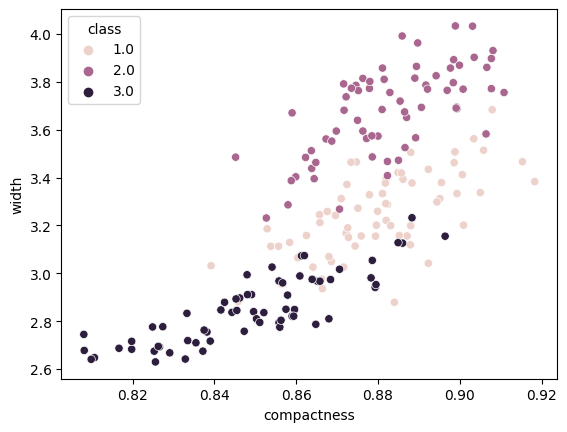

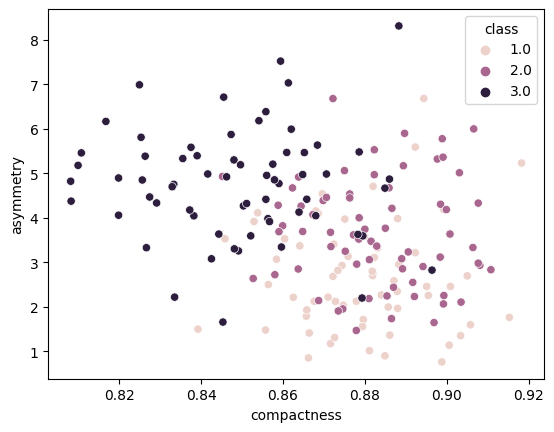

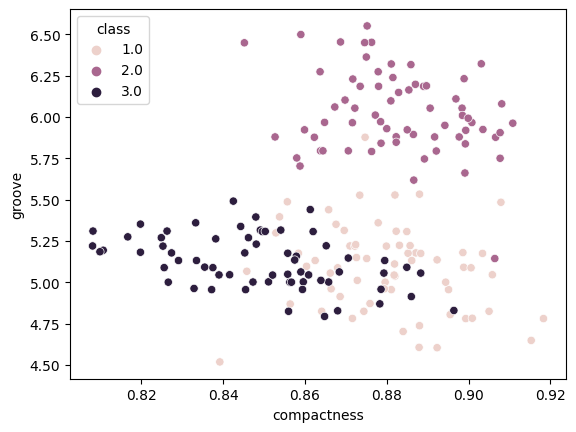

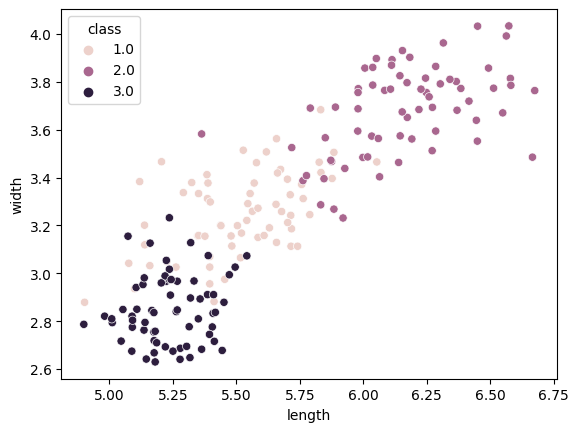

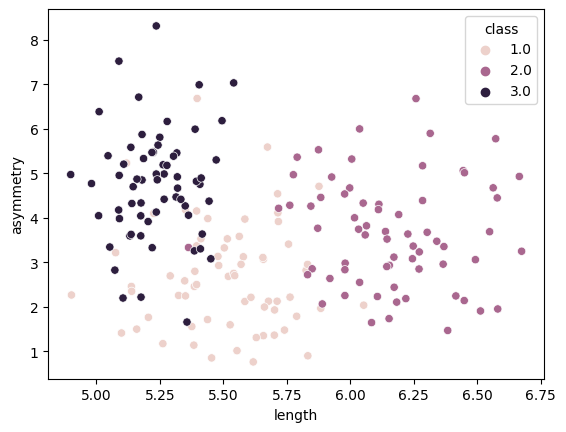

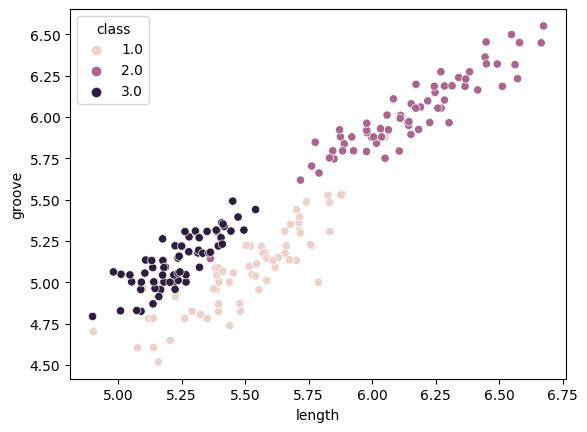

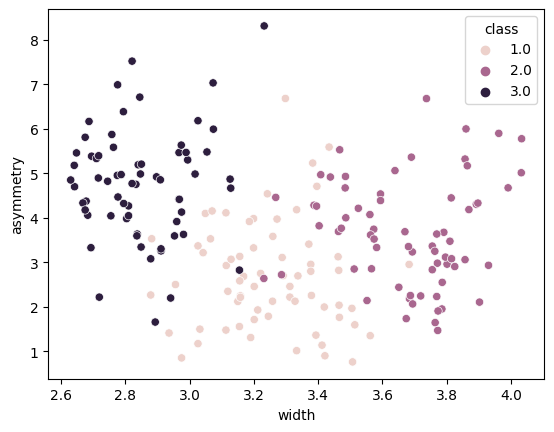

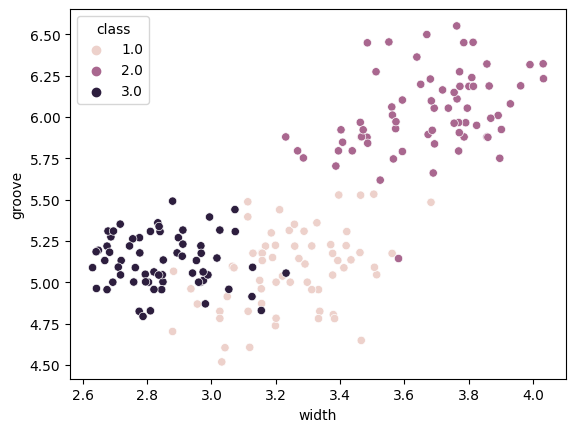

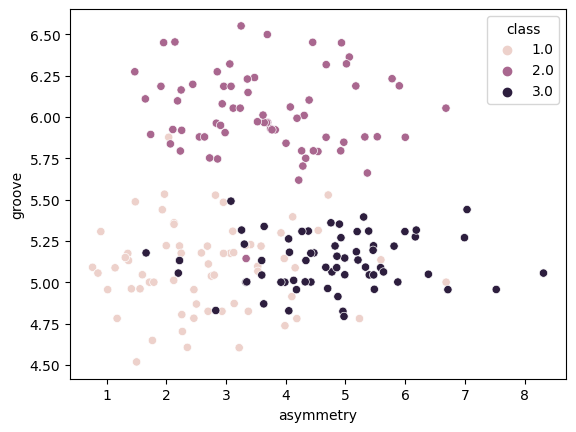

In [382]:
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        x_labels = cols[i]
        y_labels = cols[j]
        sns.scatterplot(x=x_labels, y=y_labels, data=data, hue='class')
        plt.show()

In [383]:
x = 'perimeter'
y = 'asymmetry'
X = data[[x, y]].dropna().values

In [384]:
kmeans = KMeans(n_clusters = 3).fit(X)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [385]:
clusters = kmeans.labels_

In [386]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [387]:
data['class'].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

[]

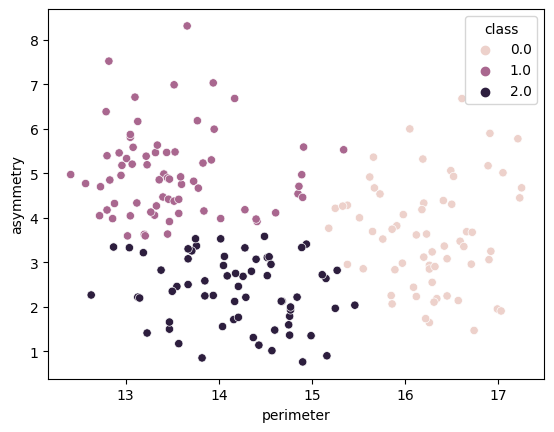

In [388]:
cluster_data = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x, y, "class"])
sns.scatterplot(x=x, y=y, hue='class', data=cluster_data)
plt.plot()

[]

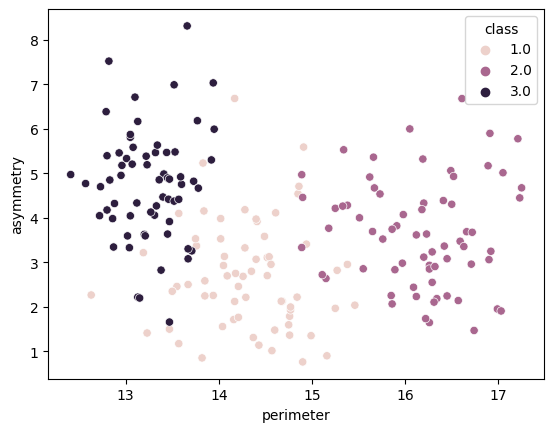

In [389]:
cluster_data = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x, y, "class"])
sns.scatterplot(x=x, y=y, hue='class', data=data)
plt.plot()

[]

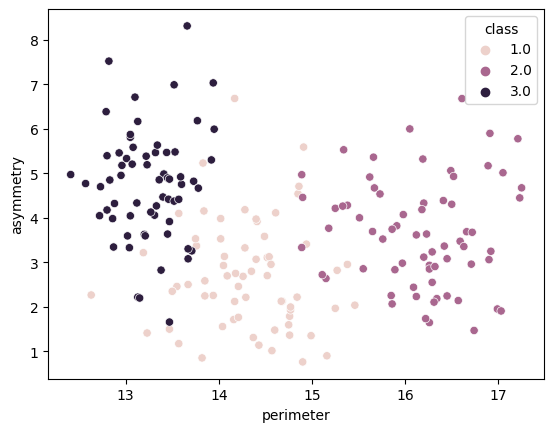

In [390]:
X = data[cols[:-1]].values
cluster_data_all = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=data.columns)
sns.scatterplot(x=x, y=y, hue='class', data=data)
plt.plot()

In [391]:
pca = PCA(n_components = 2)
transformed_x = pca.fit_transform(X)


In [392]:
X.shape

(199, 7)

In [393]:
transformed_x.shape

(199, 2)

In [394]:
transformed_x[:5]

array([[ 0.57012287, -1.43217281],
       [ 0.21214724, -2.70135005],
       [-0.75121694, -1.13589426],
       [-1.15003604, -1.62238169],
       [ 1.52055057, -2.20603586]])

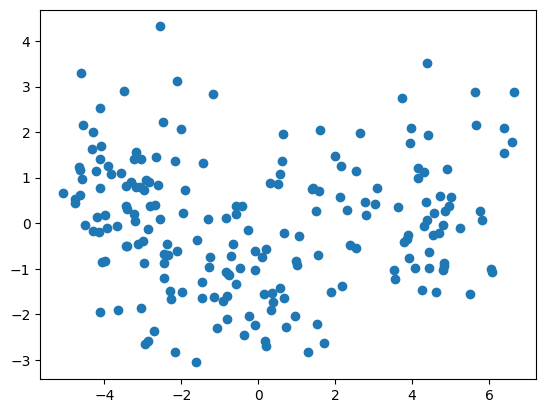

In [395]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [396]:
kmeans_pca_data = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [397]:
truth_pca_data = pd.DataFrame(np.hstack((transformed_x, data["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

[]

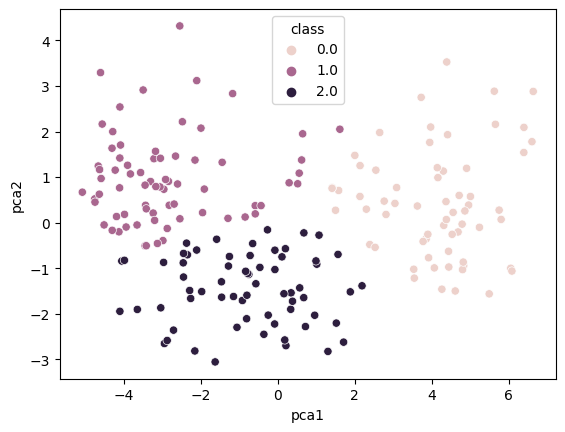

In [398]:
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_data)
plt.plot()

[]

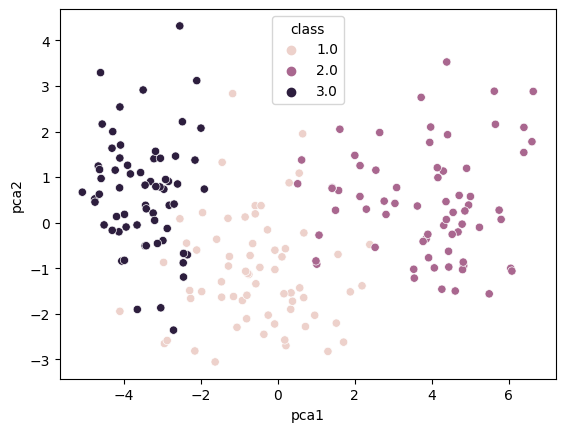

In [399]:
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_data)
plt.plot()